<u><h1> Machine Predictive Maintenance Classification </h1></u>
<font color = "red"> Aliases </font>: Predictive maintenance, Equipment Maintenance Forecasting, Machine failure


<h4><font color = "green">  Description: </font></h4> <p>This data dictionary contains metadata for the dataset used in the predictive maintenance project. The dataset contains information on machine failures and maintenance logs, and is used to predict when a machine is likely to fail. The dataset contains the following columns:</p> <br>
    •<font color = "orange"> UID:</font> A unique identifier for each observation.<br>
    •<font color = "orange"> Product ID:</font> A unique identifier for each product.<br>
    •<font color = "orange"> Type:</font> The type of machine.<br>
    •<font color = "orange"> Air Temperature [K]:</font> The air temperature in Kelvin.<br>
    •<font color = "orange"> Process Temperature [K]:</font> The process temperature in Kelvin.<br>
    •<font color = "orange"> Rotational Speed [rpm]:</font> The rotational speed of the machine in revolutions per minute.<br>
    •<font color = "orange"> Torque [Nm]:</font> The torque of the machine in Newton-meters.<br>
    •<font color = "orange"> Tool Wear [min]:</font> The amount of time the tool has been in use in minutes<br>
    •<font color = "orange"> Target:</font> A binary variable indicating whether the machine is likely to fail or not.<br>
    •<font color = "orange"> Failure Type:</font> The type of failure that occurred.<br>



<font color = "yellow"> <strong>Loading and Previewing Predictive Maintenance Data </font> </strong>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
data = pd.read_csv('data.csv') #load data into pandas dataframe
df = pd.DataFrame(data) #pri#nting the data frame
print(df)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0    

<font color = "yellow"> the basic information about the DataFrame we are working with is as follows: </font>

In [52]:
# Create a DataFrame with the same information as df.info()
info_df = pd.DataFrame({
    'Non-Null Count': df.count(),
    'Dtype': df.dtypes
})

# Apply the style
styled_info_df = info_df.style.background_gradient(cmap='magma')
styled_info_df

,Non-Null Count,Dtype
UDI,10000,int64
Product ID,10000,object
Type,10000,object
Air temperature [K],10000,float64
Process temperature [K],10000,float64
Rotational speed [rpm],10000,int64
Torque [Nm],10000,float64
Tool wear [min],10000,int64
Target,10000,int64
Failure Type,10000,object


<font color = "yellow"> Question:</font> <font color = "white"> What are the basic statistical measures (like mean, median, standard deviation, etc.) for each column in our dataset? </font>

In [23]:
df.describe().style.background_gradient(cmap="magma")

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.895680,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.750000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.500000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.250000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<font color = "yellow"> list all the columns </font>

In [53]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


<font color = "yellow"> Question:</font> <font color = "white"> is there any missing values in dataset ? if so then handle them </font>

In [10]:
print(df.isnull().sum())

# df = df.dropna() #drop all the rows with missing values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


<font color = "yellow"> Question:</font> <font color = "white"> How does the average air temperature vary by machine type? </font>

In [11]:
print(df.groupby('Type')['Air temperature [K]'].mean())

Type
H    299.866999
L    300.015833
M    300.029263
Name: Air temperature [K], dtype: float64


<font color = "yellow"> Question:</font> <font color = "white"> what is the most common failure type ? </font>

In [7]:
# common_failure_type = df['Failure Type'].mode()
# print(f"The most common failure type is {common_failure_type}.")

# Filter out 'No Failure'
filtered_df = df[df['Failure Type'] != 'No Failure']

# Calculate the mode of the filtered data
common_failure_type = filtered_df['Failure Type'].mode()

print(f"The most common failure type is {common_failure_type[0]}.")

The most common failure type is Heat Dissipation Failure.


<font color = "yellow"> Question:</font> <font color = "white"> what is the range of took wear time? </font>

In [21]:
# Extract the 'Tool wear [min]' column
tool_wear = df['Tool wear [min]']

# Calculate the minimum and maximum tool wear
min_tool_wear = tool_wear.min()
max_tool_wear = tool_wear.max()

# Calculate the range of tool wear
range_tool_wear = max_tool_wear - min_tool_wear

print(f"The minimum tool wear time is {min_tool_wear} minutes.") #in case it's non zero
print(f"The maximum tool wear time is {max_tool_wear} minutes.")
print(f"The range of tool wear time is {range_tool_wear} minutes.")

The minimum tool wear time is 0 minutes.
The maximum tool wear time is 253 minutes.
The range of tool wear time is 253 minutes.


<font color = "yellow"> Question:</font> <font color = "white"> what is the mode of the air temperature distribution? </font>

In [41]:
mode_air_temp = df['Air temperature [K]'].mode()
print(f"The mode of the air temperature distribution is {mode_air_temp} K.")

The mode of the air temperature distribution is 300.7 K.


<font color = "yellow"> Question:</font> <font color = "white"> what is the unique count of each failure type? </font>

In [43]:
failure_counts = df['Failure Type'].nunique()
print(f"There are {failure_counts} unique failure types.")

There are 6 unique failure types.


<font color = "yellow"> Question:</font> <font color = "white"> what is the 75th percentile of the air temperature? </font>

In [2]:
percentile_air_temp = df['Air temperature [K]'].quantile(0.75)
print(f"The 75th percentile of air temperature is {percentile_air_temp}K.")

The 75th percentile of air temperature is 301.5K.


<font color = "yellow"> Question:</font> <font color = "white"> What insights can be drawn from the frequency of unique values in the `Type`, `Target`, and `Failure Type` columns in the dataset? </font >

In [65]:
for col in df[['Type', 'Target', 'Failure Type']]:
    # Print the count of unique values for each column
    print(df[col].value_counts())
    # Separator for better readability
    print("****" * 8)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
********************************
Target
0    9661
1     339
Name: count, dtype: int64
********************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
********************************


<font color = "yellow"> Question:</font> <font color = "white"> What is the proportion of each failure type in the dataset? <font>

In [44]:
# Filter out 'No Failure'
filtered_df = df[df['Failure Type'] != 'No Failure']

# Calculate the proportions
proportions = filtered_df['Failure Type'].value_counts(normalize=True)

# Create the pie chart
fig = px.pie(values=proportions, names=proportions.index)

# margins
fig.update_layout(
    autosize=False,
    margin=dict(t=3, b=3, l=4, r=3),
    width=600, height=300
)
fig.show()

<font color = "yellow"> Question:</font> <font color = "white"> How does the tool wear time vary across different machine types? <font>

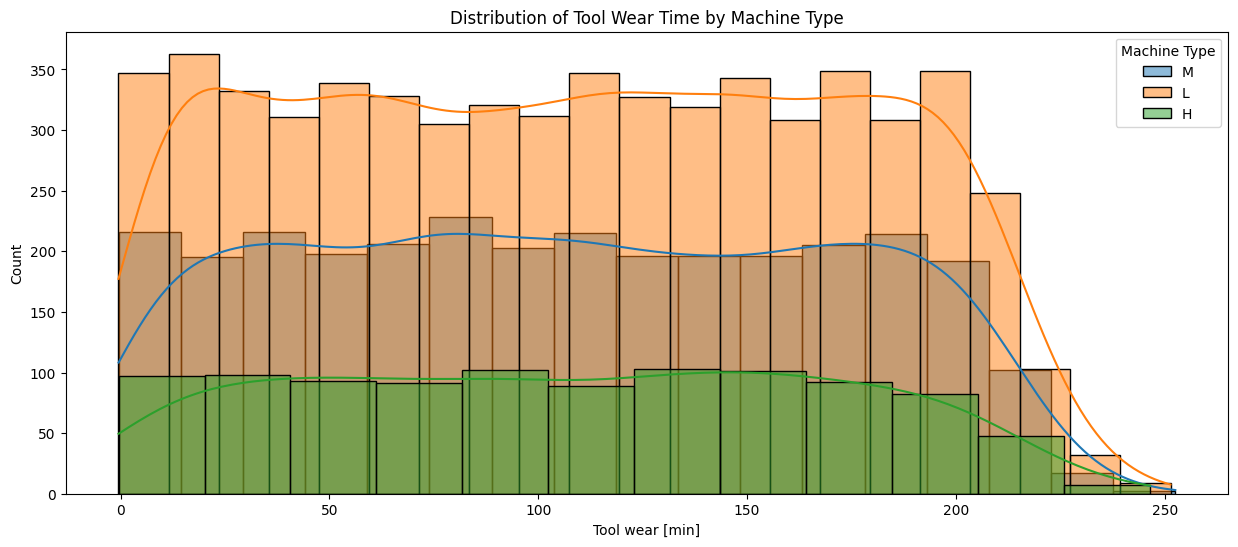

In [47]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Create a list of machine types
machine_types = df['Type'].unique()

# For each machine type, plot a histogram and KDE
for machine_type in machine_types:
    subset = df[df['Type'] == machine_type]
    sns.histplot(subset['Tool wear [min]'], kde=True, label=machine_type)

# Add title and legend
plt.title('Distribution of Tool Wear Time by Machine Type')
plt.legend(title='Machine Type')
plt.show()

<font color = "yellow"> Question:</font> <font color = "white"> Is there a correlation between rotational speed and torque? <font>

Correlation: -0.8750270862996073


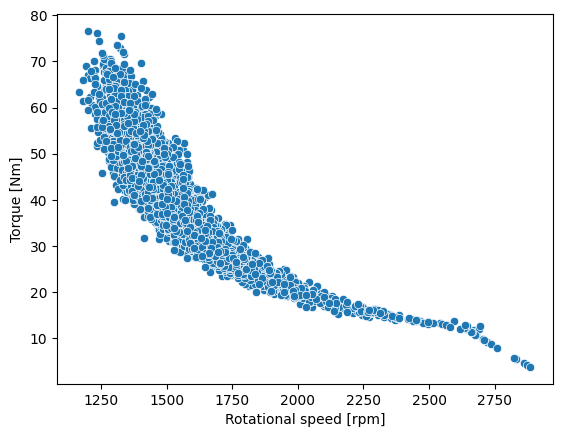

In [4]:
# Calculate the correlation
correlation = df['Rotational speed [rpm]'].corr(df['Torque [Nm]'])
print(f'Correlation: {correlation}')

# Plot the scatterplot
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', data=df)
plt.show()

<font color = "yellow"> Question:</font> <font color = "white">Are there any correlations between the features? </font>

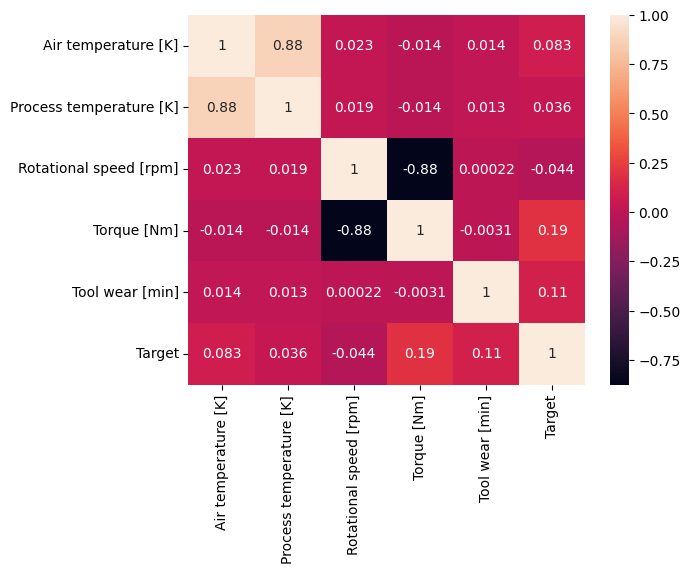

In [22]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Drop the 'UID' column because it's not needed for the correlation matrix
numeric_df = numeric_df.drop('UDI', axis=1)

# Calculate correlation matrix and create heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

<font color = "yellow"> Question:</font> <font color = "white">How does the distribution of unique values in the 'Type' column of the dataset? </font>

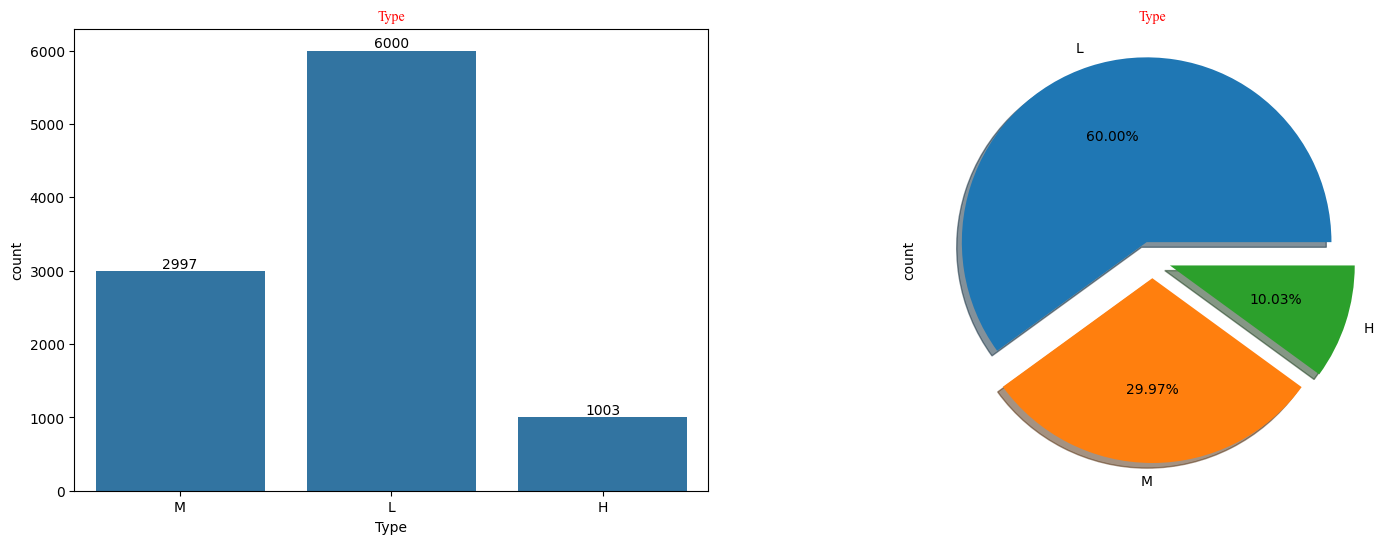

In [71]:
# Create a figure with two subplots (subplot)
plt.figure(figsize=(18, 6))

# First subplot - histogram of the count by types ('Type')
plt.subplot(1, 2, 1)
sns.countplot(x='Type', data=df)
plt.bar_label(plt.gca().containers[0])  # Add annotations with numbers above the columns
plt.title("Type", fontsize=20, color='Red', font='Times New Roman')

# Second subplot - pie chart of shares by types ('Type')
plt.subplot(1, 2, 2)
df['Type'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True)
plt.title("Type", fontsize=20, color='Red', font='Times New Roman')

# Display the plots
plt.show()

<font color = "yellow"> Question:</font> <font color = "white"> what is the histogram plot to visualize the distribution of `air temperature [k]` and `process temperature [k]` in the dataset? </font>

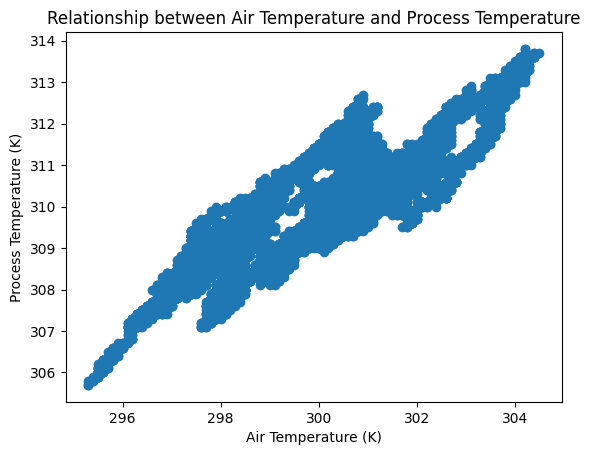

In [11]:
plt.scatter(df['Air temperature [K]'], df['Process temperature [K]'])
plt.xlabel('Air Temperature (K)')
plt.ylabel('Process Temperature (K)')
plt.title('Relationship between Air Temperature and Process Temperature')
plt.show()

<font color = "yellow"> Question:</font> <font color = "white"> What insights can we glean from this visualization about the nature of failures in the data? </font>


<Axes: xlabel='Failure Type', ylabel='count'>

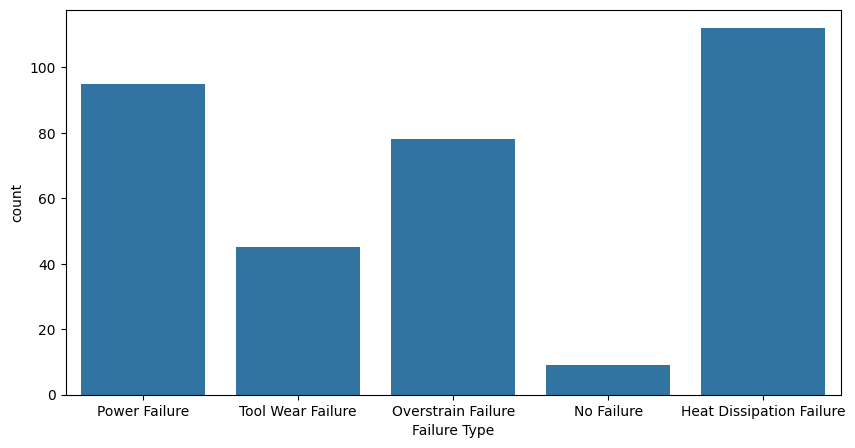

In [2]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Target']==1],x="Failure Type")
#The count on the y-axis represents the number of occurrences of each category in the 'Failure Type' column for rows where 'Target' is 1.

<font color = "yellow"> Question:</font> <font color = "white"> How does the distribution and density of the `Air temperature [K]` feature in the dataset, as visualized by a histogram and Kernel Density Estimation (KDE) line on a black background, inform our understanding of the data? </font>

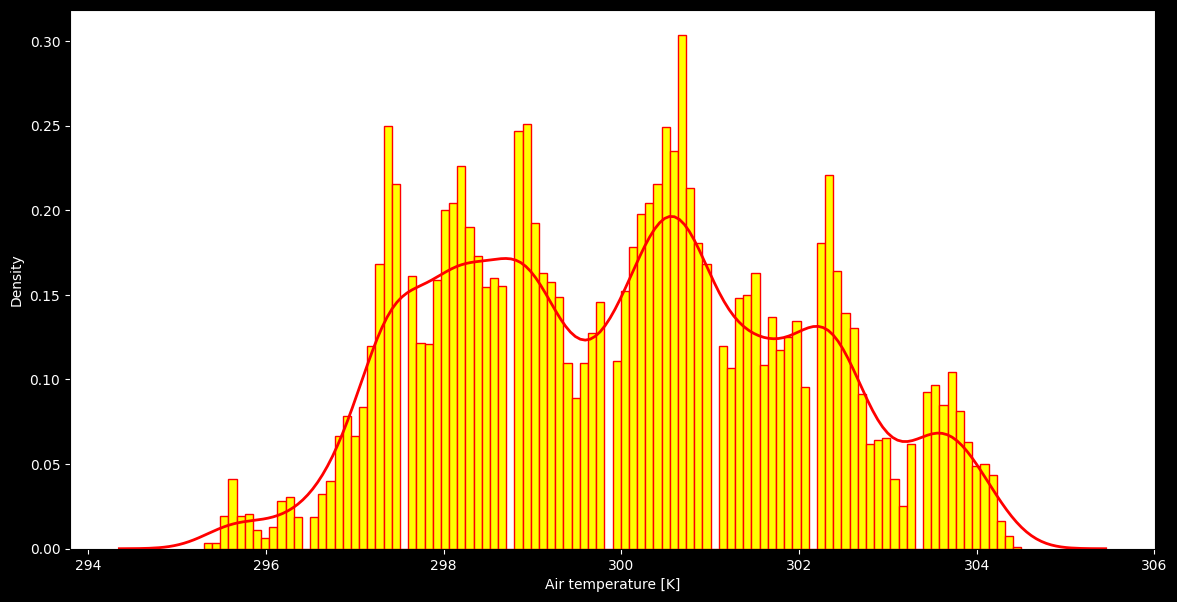

In [62]:
# Set the background to black
plt.figure(figsize=(14, 7), facecolor='black')

# Plot the histogram
n, bins, patches = plt.hist(df["Air temperature [K]"], bins=100, 
                            color="yellow", edgecolor="red", density=True)

# Plot the KDE line
sns.kdeplot(df["Air temperature [K]"], color="red", lw=2)

# Set the color of the labels to white
plt.xlabel("Air temperature [K]", color='white')
plt.ylabel("Density", color='white')
plt.tick_params(colors='white')

plt.show()

<font color = "yellow"> Question:</font> <font color = "white"> How does the distribution of `Rotational speed [rpm]` vary across different `Type` categories in the dataset? </font>

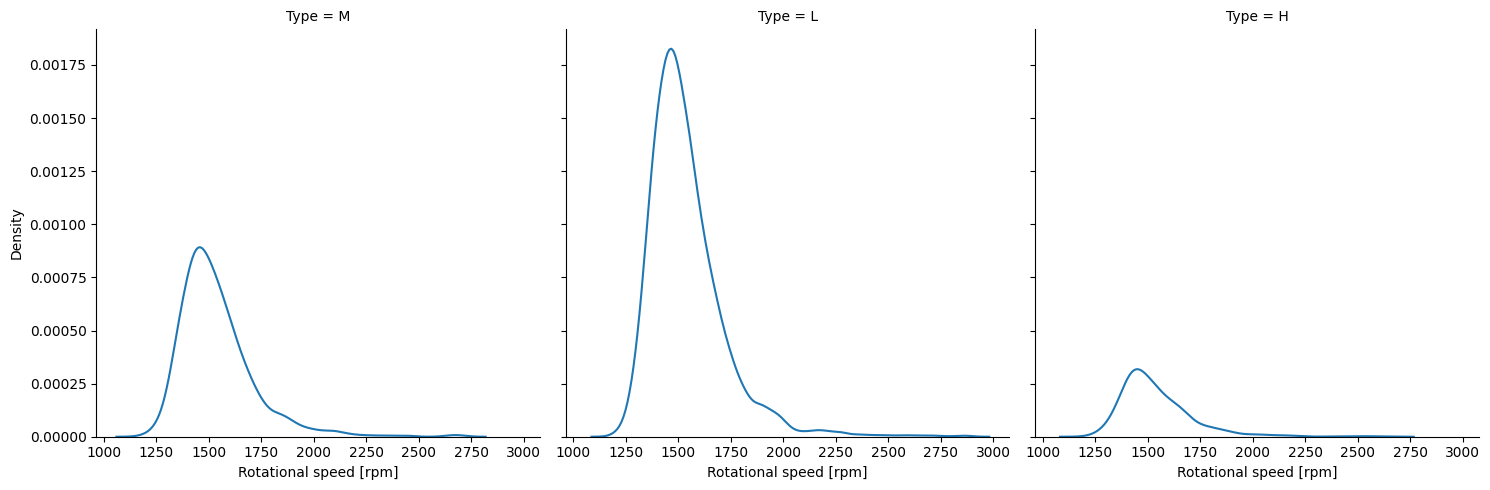

In [72]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");


<font color = "yellow"> Question:</font> <font color = "white"> In our manufacturing dataset, we have a column `Tool wear [min]` that records the tool wear time in minutes as integers. However, we have realized that this measurement can be more precise and should be recorded as decimal point numbers. 

Additionally, we want to rearrange the columns in our DataFrame to bring `Tool wear [min]` next to `Type` for easier comparison and analysis.  </font>

In [50]:
# Change the data type of the 'Tool wear [min]' column to float
df['Tool wear [min]'] = df['Tool wear [min]'].astype(float)

# Define the new order of columns
new_column_order = ['UDI', 'Product ID', 'Type', 'Tool wear [min]', 'Air temperature [K]', 
                    'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Target', 'Failure Type']

# Reindex the DataFrame and store the new DataFrame in a new variable
hi = df.reindex(new_column_order, axis=1)

# Print the info of the DataFrame to verify the changes
hi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Tool wear [min]          10000 non-null  float64
 4   Air temperature [K]      10000 non-null  float64
 5   Process temperature [K]  10000 non-null  float64
 6   Rotational speed [rpm]   10000 non-null  int64  
 7   Torque [Nm]              10000 non-null  float64
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 781.4+ KB
